# Ejercicio #1:	
Descripcion: Crear una función que modele la adición, de forma aleatoria, de artefactos impulsivos. El resultado deberá apreciarse en la visualización de la imagen, que deberá estar afectada por ruido de tipo «sal y pimienta». Como se ha visto en la asignatura, estos artefactos toman valores de intensidad máximos o mínimos, y afectan, aleatoriamente, a los píxeles de la imagen. La función a implementar debe aceptar la imagen original y devolver la imagen afectada por el ruido. Además, sería deseable que aceptara un argumento adicional para indicar el porcentaje de píxeles que se verán afectados por estos artefactos. 

## Modelado de Ruido Impulsivo

In [1]:
#Importamos el paquete de librerias
import matplotlib.pyplot as plt
import numpy as np
from skimage import data,img_as_float

In [2]:
#Se define la funcion que acepta la imagen original y devuelve la imagen afectada por el ruido
#Donde: img: matriz que representa la imagen, y p: porcentaje de ruido

def add_noisy(img,p):
    #Se selecciona el porcentaje de ruido 50% para el ruido blanco y 50% para el ruido negro
    percentage=p/2
    #Copiamos la imagen original a una auxiliar con el nombre "new_image"
    new_image = np.copy(img)
    #Configuramos el ploteo para mantener 02 graficas en una sola.
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16,10), sharex=True, sharey=True)
    
    #Ruido Negro:
    #Calculamos el numero de outilers que se adicionara a la imagen
    num_outlier_black =  int(round((percentage/100.0)*img.size))  
    #Se definen aleatoriamente las coordenadas de pixeles de la imagen que seran afectadas
    coordenadas = tuple([np.random.randint(0, i - 1, size=num_outlier_black) for i in img.shape])
    #Se establece aleatoriamente el valor 0 a un pixel que representa la intensidad de color Negro
    new_image[coordenadas] = 0
    
    # Ruido  Blanco:
    #Calculamos el numero de outilers que se adicionara a la imagen
    num_outlier_white = int(round((percentage/100.0)*img.size)) 
    #Se definen aleatoriamente las coordenadas de pixeles de la imagen que seran afectadas
    coordenadas = tuple([np.random.randint(0, i - 1, size=num_outlier_white) for i in img.shape])
    #Se establece aleatoriamente el valor 1 a un pixel que representa la intensidad de color Blanco
    new_image[coordenadas] = 1
    
    #Se extrae el contenido del canal verde ya que ofrece mejor contraste en escala de grises
    g= img[:,:,1]           #Seleccion del canal verde de Imagen original       
    g2= new_image[:,:,1]    #Seleccion del canal verde la Imagen con sal y pimienta
    
    ax1.imshow(g, cmap='gray')    #Ploteo de la imagen original
    ax2.imshow(g2, cmap='gray')   #Ploteo de la imagen con sal y pimienta
    
    return g2               #Retorna el array de la imagen para un posterior procesamiento

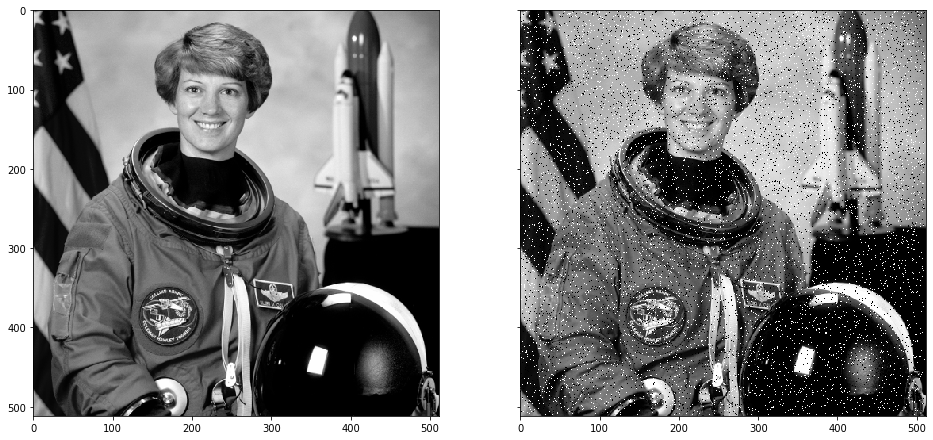

In [3]:
#Cargamos la imagen "astronauta" desde el paquete de libreria "skimage" y lo
#mapeamos a un intervalo de 0 a 1 en el array "img"
imagen = data.astronaut()
#El valor de la intensidad de pixeles son mapeados de uint8(0-255) a float(0-1)
img = img_as_float(imagen)
#Llamamos a la funcion y seteamos a 5% el valor de porcentaje que se vera afectado en la imagen
img_noisy=add_noisy(img,5)

#  Ejercicio #2
Descripcion: A partir de la imagen ruidosa, buscaremos eliminar los artefactos impulsivos para el posterior tratamiento de la imagen. Para ello, se deberá aplicar un filtro adecuado para este tipo de ruido.

## Eliminacion de Artefactos Impulsivos

In [4]:
#Importamos libreria Scipy para calcular el filtro de mediana de la imagen
from scipy import ndimage

In [5]:
#Se define la funcion que permite eliminar los artefactos impulsivos
def delete_noisy(img,p):
    #Se emplea el filtro mediana que es el mas adecuado para eliminar los valores atipicos de la imagen
    img_median = ndimage.median_filter(img, p)  
    #Se configura el grafico para su visualizacion
    fig, ax=  plt.subplots(ncols=1, figsize=(16,10), sharex=True, sharey=True)
    ax.imshow(img_median,cmap='gray')
    plt.show()
    return img_median #Nos retorna la matriz de la imagen filtrada para un posterior procesamiento

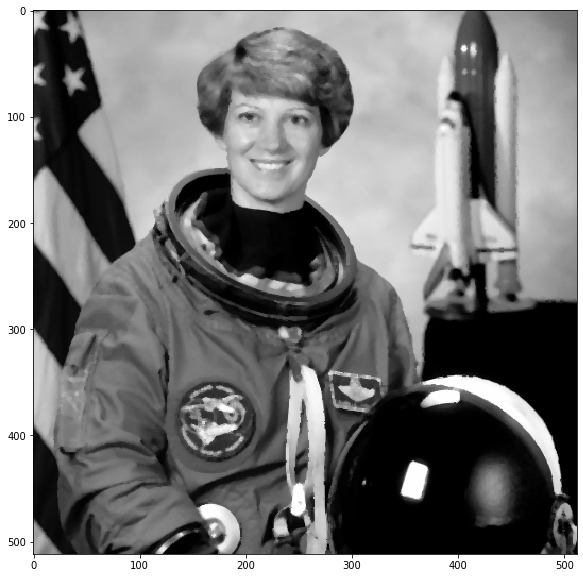

In [6]:
img_median_filtered=delete_noisy(img_noisy,4) #Llamamos a la funcion para ejecutar

#  Ejercicio #3
Por último, a partir de la imagen obtenida en la etapa anterior, se busca identificar las siluetas de las estructuras en ella presentes. Para este fin, se debe identificar y razonar qué tipo de operador corresponde aplicar. 

## Deteccion de Bordes en una imagen

In [7]:
#Importamos libreria para el filtro mediante el operador SOBEL
from skimage import filters

In [8]:
#Se define la funcion que permitira detectar los bordes de la imagen
def identificar_siluetas(img):
    imsobel= filters.sobel(img) #Se emplea el operador Sobel para la deteccion de bordes
    fig, ax1 = plt.subplots(ncols=1, figsize=(16,10), sharex=True, sharey=True)
    ax1.imshow(imsobel,cmap='gray')
    plt.show()

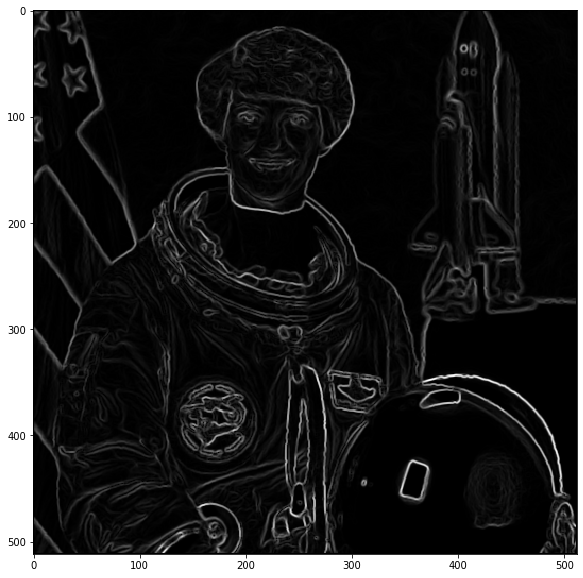

In [9]:
identificar_siluetas(img_median_filtered) #Se llama a la funcion que permitira visualizar las siluetas de la imagen